In [73]:
import glob
import tensorflow as tf
import pickle
import sys
import numpy as np
from PIL import Image
sys.path.append('../../')
from bias_detection import get_image_names_from_reducing_bias, img_name_to_img_id
from build_mscoco_fine_tune_data import ImageDecoder

In [18]:
data_dir = '/data1/caption_bias/models/research/im2txt/im2txt/data/blocked_subset_data_avg/'
tf_record_files = glob.glob(data_dir + '*') # add file names to read here

In [23]:
# ensure that images have male female
target_train = '/data1/caption_bias/models/research/im2txt/im2txt/data/raw-data/reducingbias/data/COCO/train.data'
target_val = '/data1/caption_bias/models/research/im2txt/im2txt/data/raw-data/reducingbias/data/COCO/dev.data'
target_test = '/data1/caption_bias/models/research/im2txt/im2txt/data/raw-data/reducingbias/data/COCO/test.data'

male_female_images = create_dict_from_list(pickle.load(open(target_train))) # should add better methods to bias_detection
male_female_images.update(create_dict_from_list(pickle.load(open(target_test))))
male_female_images.update(create_dict_from_list(pickle.load(open(target_val))))

In [27]:
male_female_images = [img_name_to_img_id(img_name) for img_name in male_female_images.keys()]

In [50]:
# ensure that image_id is in reducing bias dataset
for example in tf.python_io.tf_record_iterator(tf_record_files[0]):
    result = tf.train.Example.FromString(example)
    image_id = int(result.features.feature['image/image_id'].int64_list.value[0])
    if image_id not in male_female_images:
        print(image_id) # see keys of tfrecord file

In [101]:
# view keys of tfrecord files
for example in tf.python_io.tf_record_iterator(tf_record_files[0]):
    result = tf.train.Example.FromString(example)
    print(result.features.feature.keys())

In [104]:
# view images
result_list = list(tf.python_io.tf_record_iterator(tf_record_files[0]))
result = tf.train.Example.FromString(results[200])

normal = result.features.feature['image/data'].bytes_list.value[0]
blocked = result.features.feature['image/blocked_data'].bytes_list.value[0]

decoder = ImageDecoder()
normal_img = decoder.decode_jpeg(normal)
blocked_img = decoder.decode_jpeg(blocked)

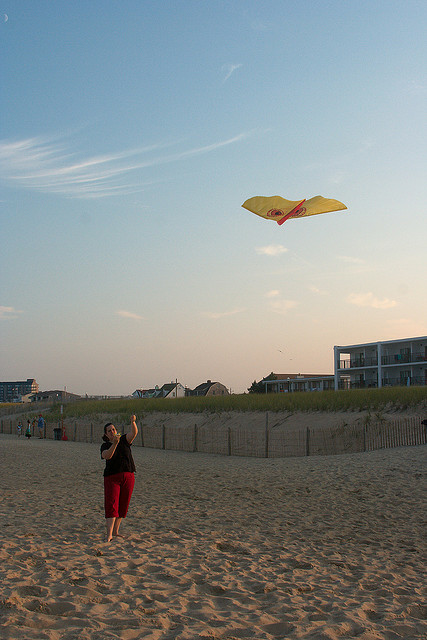

In [105]:
img = Image.fromarray(normal_img, 'RGB')
img

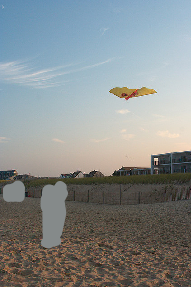

In [106]:
img = Image.fromarray(blocked_img, 'RGB')
img